In [83]:
import pandas as pd

In [110]:
data = pd.read_csv('tweet_global_warming.csv')
data

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087
...,...,...,...
6085,"@bloodless_coup ""The phrase 'global warming' s...",Y,1.0000
6086,Virginia to Investigate Global Warming Scienti...,NaN,1.0000
6087,Global warming you tube parody you will enjoy ...,N,0.6411
6088,One-Eyed Golfer: Don't dare tell me about glob...,N,1.0000


In [111]:
data.columns

Index(['tweet', 'existence', 'existence.confidence'], dtype='object')

In [112]:
del data['existence']
del data['existence.confidence']
data

,tweet
0,Global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...
2,Carbon offsets: How a Vatican forest failed to...
3,Carbon offsets: How a Vatican forest failed to...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...
...,...
6085,"@bloodless_coup ""The phrase 'global warming' s..."
6086,Virginia to Investigate Global Warming Scienti...
6087,Global warming you tube parody you will enjoy ...
6088,One-Eyed Golfer: Don't dare tell me about glob...


In [113]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [114]:
regex = r"[^0-9A-Za-z'\t]"
newdata = data.copy()
import re
newdata['nonchar'] = newdata['tweet'].apply(lambda x:re.findall(regex,x))
newdata['clean_comments'] = newdata['tweet'].apply(lambda x:re.sub(regex,"  ",x))

In [115]:
newdata['polarity'] = data['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
newdata.head()

,tweet,nonchar,clean_comments,polarity
0,Global warming report urges governments to act...,"[ , , , , , , |, ,, , , (, ), , -, , ...",Global warming report urges governments t...,0.00
1,Fighting poverty and global warming in Africa ...,"[ , , , , , , , [, ]]",Fighting poverty and global warming in A...,0.00
2,Carbon offsets: How a Vatican forest failed to...,"[ , :, , , , , , , , , , , [, ]]",Carbon offsets How a Vatican forest fa...,-0.25
3,Carbon offsets: How a Vatican forest failed to...,"[ , :, , , , , , , , , , , [, ]]",Carbon offsets How a Vatican forest fa...,-0.25
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,"[:, , , , , , , , , , , [, ]]",URUGUAY Tools Needed for Those Most Vu...,0.00


In [116]:
newdata = data.sample(frac=1).reset_index(drop=True)

In [117]:
newdata['pol_cat']  = 0

In [120]:
newdata['pol_cat'][newdata.polarity > 0] = 1
newdata['pol_cat'][newdata.polarity <= 0] = -1

AttributeError: 'DataFrame' object has no attribute 'polarity'

In [119]:
newdata

,tweet,pol_cat
0,RT @MarthaStewart: much needed rain is falling...,0
1,RT @Newsweek: Global Warming Kills Forests In ...,0
2,Some hot health reminders on global warming: T...,0
3,Snow covers Washington DC - Must hand it to Ob...,0
4,Decision Time ' UK Election & Climate Change h...,0
...,...,...
6085,Restoration of Australian landscape enhances a...,0
6086,"Hey #tcot, your frozen margarita may become en...",0
6087,The Effect Of Organic Farming In Climate Chang...,0
6088,block @justkorwhore . her very existence on tw...,0


In [105]:
newdata['pol_cat'].value_counts()

-1    4120
 1    1970
Name: pol_cat, dtype: int64

In [106]:
data_pos = newdata[newdata['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = newdata[newdata['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

In [107]:
data_pos.head()

,tweet,polarity,pol_cat
0,Video: MS-NBC's Brewer claims heavy snowfall p...,0.033333,1
1,"RT @OpenSociety: OSI ""leads the way"" in addres...",0.125000,1
2,Asking Your Own Man 100 Questions To Discover ...,0.600000,1
3,RT @globetrottgirl I'm doing my part in contri...,0.125000,1
4,@LilBitSassy Can you say global warming!..hmpf...,0.500000,1


In [108]:
data_pos.shape

(1970, 3)

In [109]:
data_neg.head()

,tweet,polarity,pol_cat
0,Opponents ramp up effort to delay Calif. globa...,0.0,-1
1,"Government scientists suggest inter-agency ""fu...",0.0,-1
2,UK panel ropes in India to fight climate chang...,0.0,-1
3,"RT @LAist: Speaking at a CA Event today, Palin...",0.0,-1
4,29 Graphs of Climate Change Science in One Pla...,0.0,-1


In [82]:
data_pos['clean_comments'][1]

KeyError: 'clean_comments'

-1    4120
 1    1970
Name: pol_cat, dtype: int64

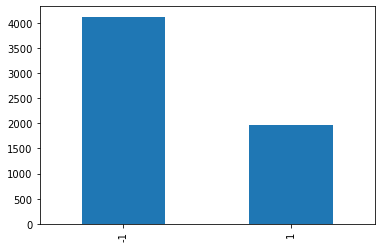

In [24]:
newdata.pol_cat.value_counts().plot.bar()
newdata.pol_cat.value_counts()

In [25]:
newdata.describe()

,polarity,pol_cat
count,6090.000000,6090.000000
mean,0.028310,-0.353038
std,0.206951,0.935686
min,-1.000000,-1.000000
25%,0.000000,-1.000000
50%,0.000000,-1.000000
75%,0.100000,1.000000
max,1.000000,1.000000


In [32]:
data['clean_comments'][0]

KeyError: 'clean_comments'

In [26]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [27]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
stop_words = set(stopwords.words('english'))

In [29]:
data['clean_comments'] = data['clean_comments'].str.strip()

KeyError: 'clean_comments'

In [30]:
train = data.copy()

In [31]:
train['clean_comments'] = train['clean_comments'].str.strip()

KeyError: 'clean_comments'